# 1: Imports and Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

# Load cleaned datasets
benin = pd.read_csv('../data/benin_clean.csv')
sierra = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

# Add country column
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine
df = pd.concat([benin, sierra, togo], ignore_index=True)

# 2: Boxplots for GHI, DNI, DHI

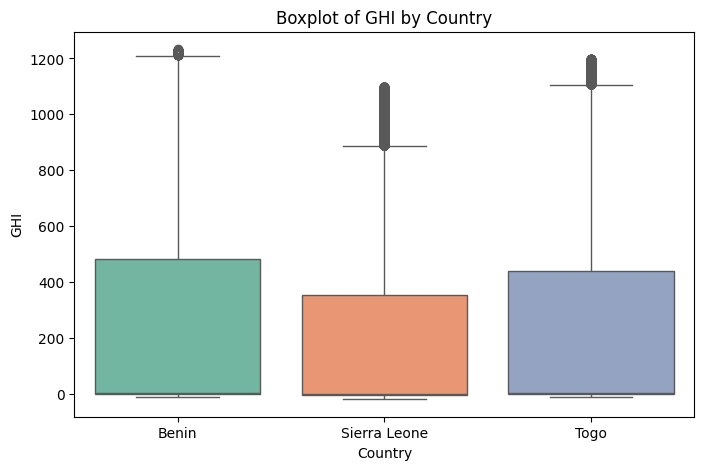

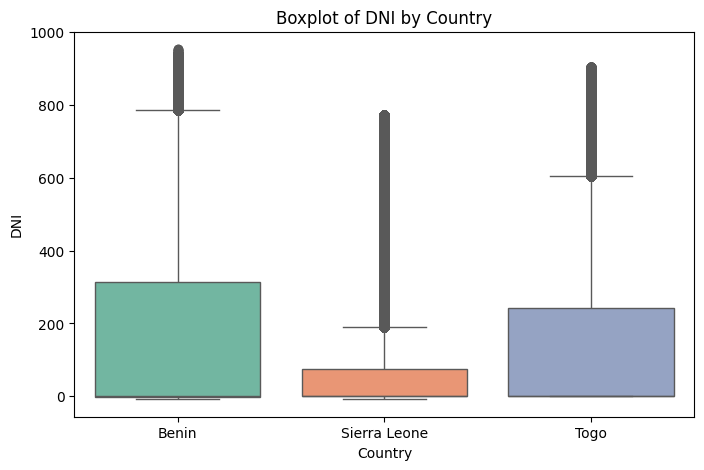

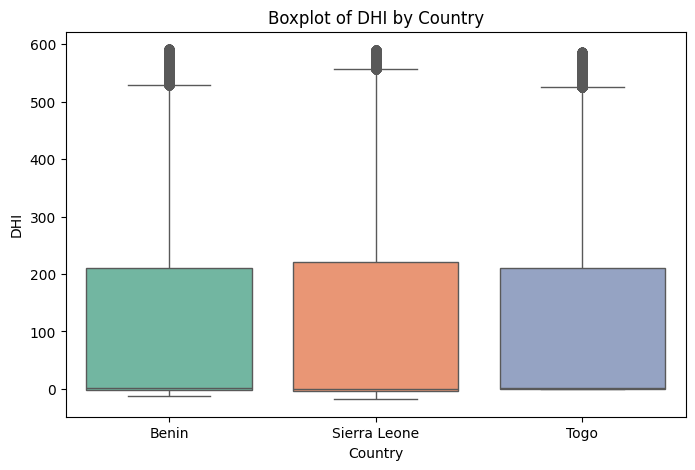

In [6]:
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, hue='Country', data=df, palette='Set2', legend=False)
    plt.title(f'Boxplot of {metric} by Country')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.show()

# 3: Summary Table

In [3]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.342811    1.8  330.868308  167.187516   -0.1  261.710501   
Sierra Leone  196.441990    0.3  291.235290  104.527217   -0.1  201.696328   
Togo          229.831936    2.1  321.643747  149.368966    0.0  248.554496   

                     DHI                     
                    mean median         std  
Country                                      
Benin         110.906983    1.6  152.916844  
Sierra Leone  110.109541   -0.1  154.170508  
Togo          112.408673    2.5  151.292938

# 4: Statistical Testing (ANOVA & Kruskal–Wallis)

In [4]:
# Prepare data
ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierra['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

# ANOVA
anova_stat, anova_p = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
# Kruskal–Wallis
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_sierra, ghi_togo)

print(f"ANOVA p-value: {anova_p:.4g}")
print(f"Kruskal–Wallis p-value: {kruskal_p:.4g}")

ANOVA p-value: 0
Kruskal–Wallis p-value: 0


# 5: Visual Summary (Bar Chart of Average GHI)

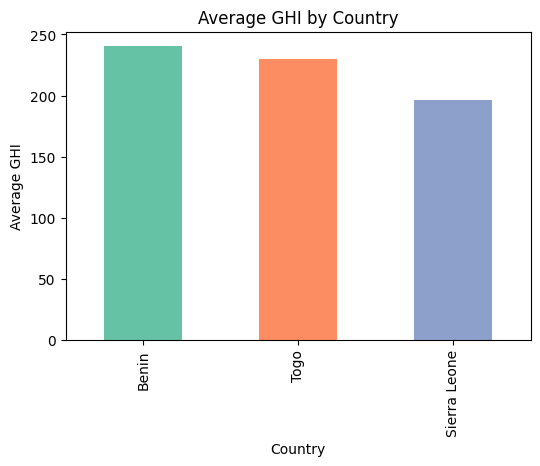

In [5]:
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'], figsize=(6,4))
plt.ylabel('Average GHI')
plt.title('Average GHI by Country')
plt.show()

# 6: Key Observations

### Key Observations

- Benin shows the highest median GHI, but also the greatest variability.
- Sierra Leone has the lowest average GHI among the three countries.
- The ANOVA/Kruskal–Wallis p-values indicate that differences in GHI between countries are statistically significant (p < 0.05).